In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
df1 = pd.read_csv('ev_charger_dataset.csv')
df1.head()

,Region,2W,3W,4W,Bus,Chargers
0,Uttar Pradesh,9852,42881,458,197,207
1,Maharastra,38558,893,1895,186,317
2,Karnataka,32844,568,589,57,172
3,Tamil Nadu,25642,396,426,0,256
4,Gujarat,22359,254,423,22,228


In [5]:
pip install openpyxl

   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/250.9 kB 435.7 kB/s eta 0:00:01
   -------------- ------------------------- 92.2/250.9 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------  245.8/250.9 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
df3 = pd.read_excel('ev_market_india_dataset.xlsx')
df3.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


### Analysing the datasets

In [8]:
print('DF1 Shape:', df1.shape)
print('DF3 Shape:', df3.shape)

DF1 Shape: (24, 6)
DF3 Shape: (103, 14)


In [9]:
df1.describe()
df3.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,444.271845,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,203.949253,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


### Analysis of 2-wheeler EVs


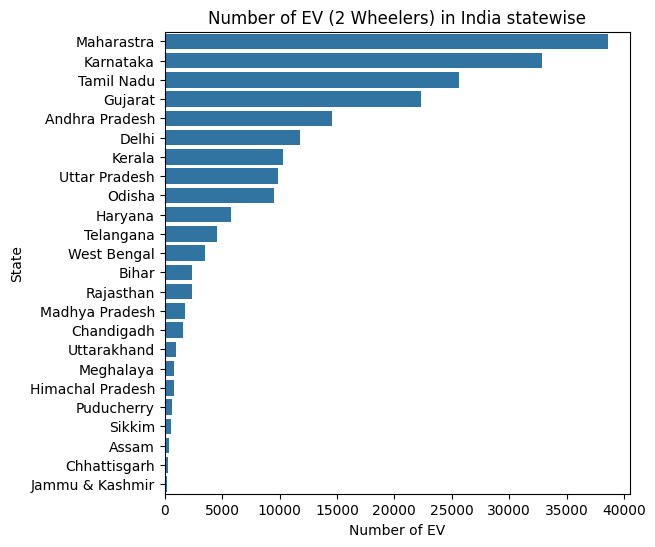

In [20]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'], x='2W', order=df1.sort_values('2W', ascending=False)['Region'])
plt.ylabel('State')
plt.xlabel('Number of EV')
plt.title(label='Number of EV (2 Wheelers) in India statewise')
plt.show()

### Analysis of 3-wheeler EVs

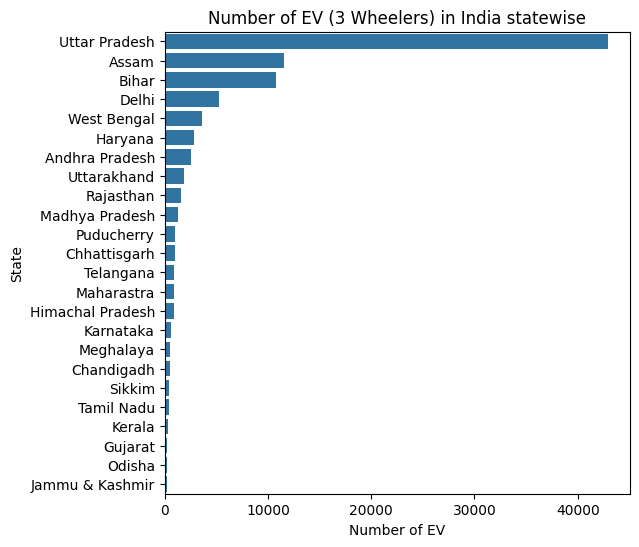

In [34]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'], x='3W', order=df1.sort_values('3W', ascending=False)['Region'])
plt.ylabel('State')
plt.xlabel('Number of EV')
plt.title(label='Number of EV (3 Wheelers) in India statewise')
plt.show()

### Analysis 4-wheeler EVs

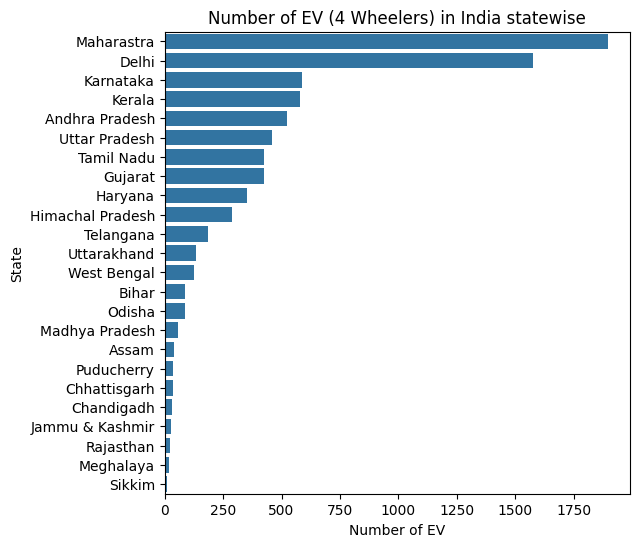

In [35]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'], x='4W', order=df1.sort_values('4W', ascending=False)['Region'])
plt.ylabel('State')
plt.xlabel('Number of EV')
plt.title(label='Number of EV (4 Wheelers) in India statewise')
plt.show()

### Analysis of different bodystyle of EV

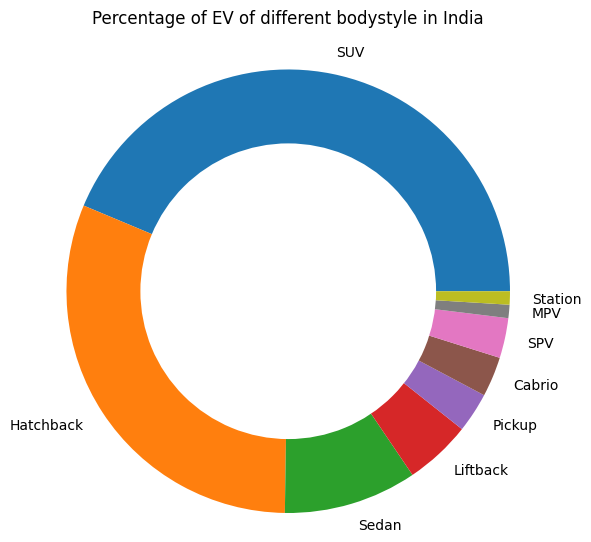

In [44]:
x = df3['BodyStyle'].value_counts().plot.pie(radius=1.5)
plt.pie(x=[1], radius=1, colors='white')
plt.title(label='Percentage of EV of different bodystyle in India', pad=60)
plt.ylabel('')
plt.show()

### Analysis of EVs of different number of seats

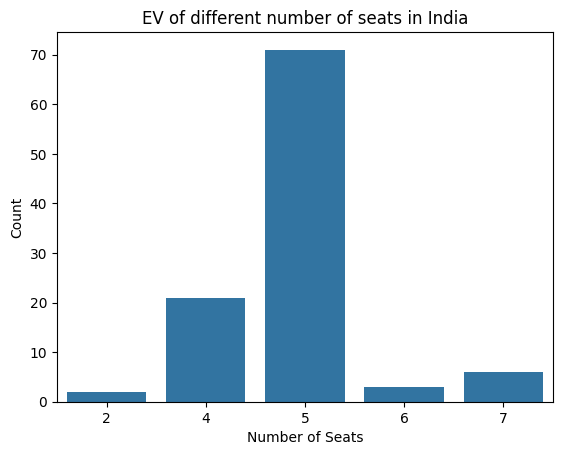

In [47]:
sns.countplot(data=df3, x='Seats')
plt.xlabel('Number of Seats')
plt.ylabel('Count')
plt.title(label='EV of different number of seats in India')
plt.show()

### Model Building Using K-Means Clusteing

In [48]:
df3['PowerTrain'].replace(to_replace=['RWD','FWD','AWD'], value=[0, 1, 2], inplace=True)
df3['RapidCharge'].replace(to_replace=['No','Yes'], value=[0, 1], inplace=True)

C:\Users\ahaan\AppData\Local\Temp\ipykernel_24748\1104875662.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['PowerTrain'].replace(to_replace=['RWD','FWD','AWD'], value=[0, 1, 2], inplace=True)
C:\Users\ahaan\AppData\Local\Temp\ipykernel_24748\1104875662.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcast

In [49]:
X = df3[['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.429225,-0.554599,1.147772,-0.882791,0.839988,-0.959297,0.998880,0.711148,0.396662
1,-2.322483,-0.345449,-0.896473,-1.305529,0.079598,0.235116,-0.213678,-0.544135,0.181867
2,1.587851,0.008899,0.650523,0.041024,0.593537,-0.698248,0.058718,0.248837,0.202775
3,0.291018,-0.000150,0.307702,-0.514196,-1.608861,0.291624,0.364999,-0.235543,-0.261663
4,-2.602679,-0.626489,0.888088,0.585294,-0.802108,0.027387,-0.084955,-0.507790,0.049904


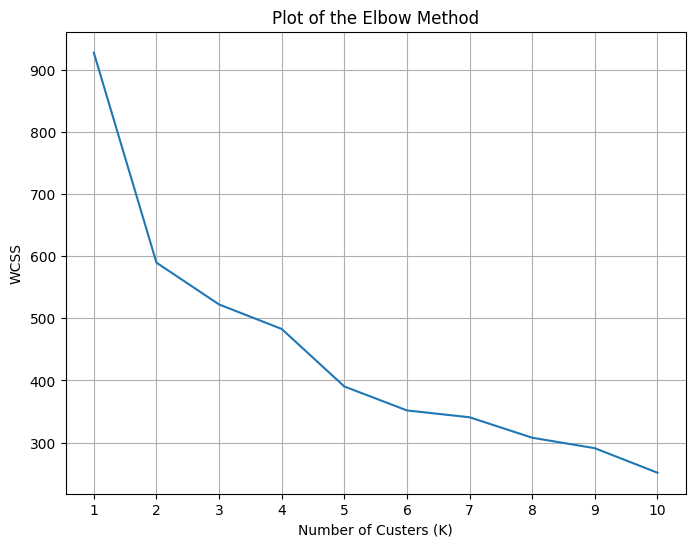

In [60]:
wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel('Number of Custers (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [61]:
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

KMeans(n_clusters=4, random_state=90)

In [62]:
print(kmean.labels_)

[1 3 1 0 3 1 3 2 0 1 1 2 2 0 3 0 1 3 3 2 2 1 2 1 1 0 0 1 3 3 1 2 2 1 2 2 2
 0 3 2 1 2 1 3 3 2 2 1 2 2 1 1 2 0 1 3 2 3 2 1 3 1 0 1 0 1 2 1 3 1 2 2 1 1
 2 2 1 3 1 1 0 1 3 0 0 2 0 1 1 0 1 3 2 1 2 0 2 0 2 1 1 1 1]


In [63]:
pd.Series(kmean.labels_).value_counts()

1    38
2    30
3    18
0    17
Name: count, dtype: int64

In [64]:
df3['clusters'] = kmean.labels_

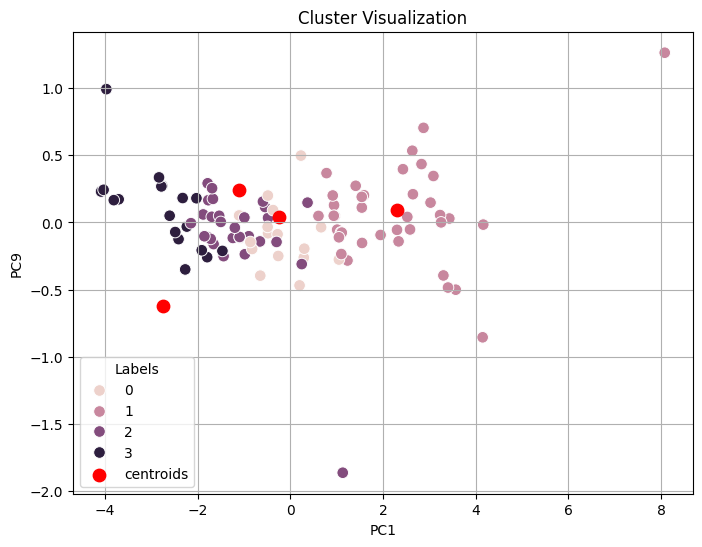

In [79]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC9', s=70, hue=kmean.labels_)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], c="r", s=80, label="centroids")
plt.xlabel('PC1')
plt.ylabel('PC9')
plt.grid()
plt.legend(title='Labels')
plt.title('Cluster Visualization')
plt.show()